In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import scikit_posthocs as spp


In [3]:
data = pd.read_csv("winemag-data-130k-v2.csv")
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [4]:
df = data[[ 'country', 'description', 'designation', 'points', 'price', 'province', 'title', 'variety', 'winery']]
df.to_csv('wine.csv',index=False)
dataNew = pd.read_csv("wine.csv")
dataNew = dataNew.loc[dataNew['price'] >= 0]
dataNew = dataNew.loc[dataNew['points'] >= 0]
dataNew

,country,description,designation,points,price,province,title,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [5]:
dataNew['pointsbyprice']= dataNew.apply(lambda x: x['points']/(10+np.log( x['price'])), axis=1)

Создаём базы данных:

In [6]:
dataGreece = dataNew.loc[dataNew['country'] == 'Greece']
len(dataGreece)

461

In [7]:
dataCanada = dataNew.loc[dataNew['country'] == 'Canada']
len(dataCanada)

254

In [20]:
dataPortugal = dataNew.loc[dataNew['country'] == 'Portugal']
dataPortugalClear = dataPortugal
dataPortugal = dataPortugal.loc[dataPortugal['variety'] == 'Port']
len(dataPortugal)

438

In [25]:
dataPortugalWithoutPort = dataPortugalClear.loc[dataPortugalClear['province'] != 'Douro']
len(dataPortugalWithoutPort)

3741

In [22]:
dataPortugalClear['title'].unique()

array(['Quinta dos Avidagos 2011 Avidagos Red (Douro)',
       'Herdade Grande 2014 Gerações Colheita Seleccionada Branco White (Alentejano)',
       'Casa Santa Vitória 2013 Grande Reserva Tinto Red (Alentejano)',
       ..., 'Sogrape 2014 Silk & Spice Red (Portuguese Table Wine)',
       'Quinta de Foz de Arouce 2015 Cerceal (Beira Atlantico)',
       'Caves Transmontanas 2006 Vértice Pinot Noir (Douro)'],
      dtype=object)

In [9]:
dataGCP = pd.concat([dataGreece, dataCanada, dataPortugal])

# Проверка нормальности

Греция:

(array([ 7.,  4.,  9., 12., 15., 33., 33., 41., 33., 30., 52., 37., 29.,
        34., 46., 18., 15.,  5.,  5.,  3.]),
 array([6.09804574, 6.15924123, 6.22043672, 6.2816322 , 6.34282769,
        6.40402318, 6.46521867, 6.52641415, 6.58760964, 6.64880513,
        6.71000062, 6.77119611, 6.83239159, 6.89358708, 6.95478257,
        7.01597806, 7.07717354, 7.13836903, 7.19956452, 7.26076001,
        7.3219555 ]),
 <BarContainer object of 20 artists>)

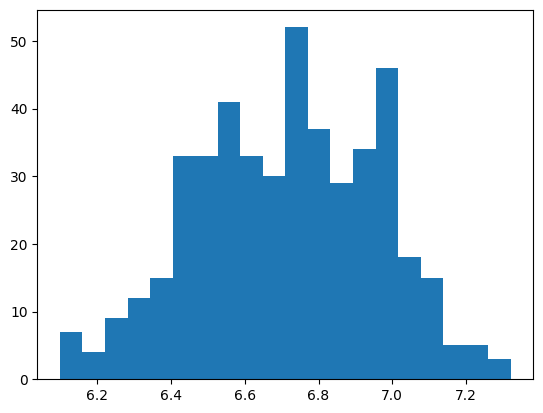

In [10]:
plt.hist(dataGreece['pointsbyprice'], bins = 20)

In [11]:
stats.shapiro(dataGreece['pointsbyprice'])

ShapiroResult(statistic=0.9893957376480103, pvalue=0.0020465347915887833)

Не нормальная

Канада:

(array([ 1.,  0.,  0.,  1.,  5.,  3.,  9., 13., 23., 24., 21., 24., 32.,
        23., 28., 18., 14.,  6.,  7.,  2.]),
 array([5.82571112, 5.89515992, 5.96460872, 6.03405753, 6.10350633,
        6.17295513, 6.24240394, 6.31185274, 6.38130155, 6.45075035,
        6.52019915, 6.58964796, 6.65909676, 6.72854556, 6.79799437,
        6.86744317, 6.93689198, 7.00634078, 7.07578958, 7.14523839,
        7.21468719]),
 <BarContainer object of 20 artists>)

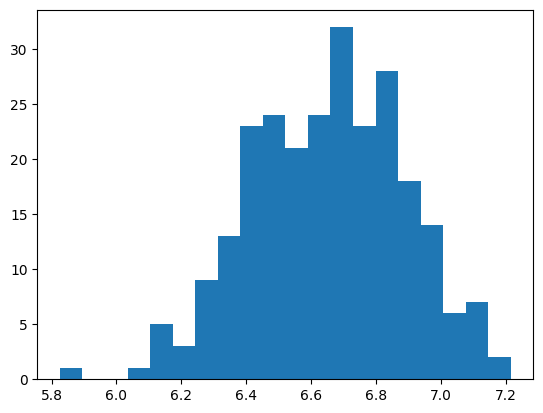

In [12]:
plt.hist(dataCanada['pointsbyprice'], bins = 20)

In [13]:
stats.shapiro(dataCanada['pointsbyprice'])

ShapiroResult(statistic=0.9927513003349304, pvalue=0.25158336758613586)

Нормальная

Португалия:

(array([ 1.,  0.,  0.,  2.,  1.,  2.,  3.,  5., 12., 12., 18., 23., 69.,
        83., 72., 59., 39., 24.,  8.,  5.]),
 array([5.21831982, 5.31554296, 5.4127661 , 5.50998923, 5.60721237,
        5.7044355 , 5.80165864, 5.89888178, 5.99610491, 6.09332805,
        6.19055119, 6.28777432, 6.38499746, 6.4822206 , 6.57944373,
        6.67666687, 6.77389   , 6.87111314, 6.96833628, 7.06555941,
        7.16278255]),
 <BarContainer object of 20 artists>)

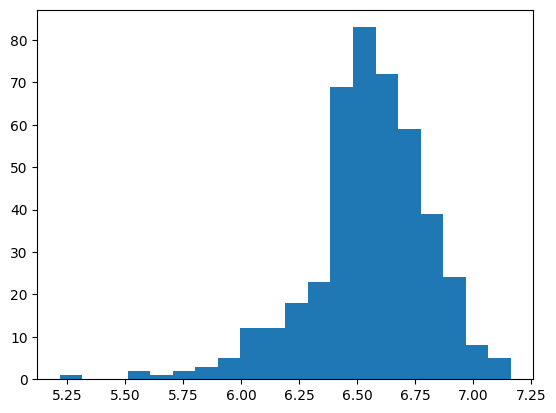

In [14]:
plt.hist(dataPortugal['pointsbyprice'], bins=20)

In [15]:
stats.shapiro(dataPortugal['pointsbyprice'])

ShapiroResult(statistic=0.9564327001571655, pvalue=4.374003936824522e-10)

Не нормальная

# Дисперсии:

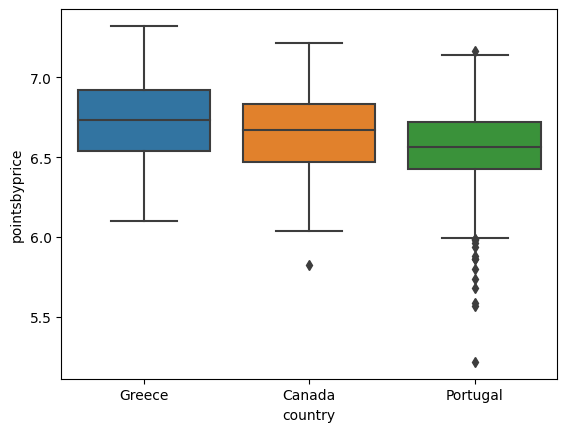

In [16]:
sns.boxplot( y=dataGCP['pointsbyprice'], x=dataGCP['country'] );
plt.show()

In [17]:
stats.levene(dataGCP['pointsbyprice'][dataGCP['country'] == 'Canada'],
            dataGCP['pointsbyprice'][dataGCP['country'] == 'Greece'],
            dataGCP['pointsbyprice'][dataGCP['country'] == 'Portugal'])

LeveneResult(statistic=0.8390753208331856, pvalue=0.43237426975363225)

Дисперсии трёх стран РАВНЫ

In [19]:
stats.kruskal(dataGCP['pointsbyprice'][dataGCP['country'] == 'Canada'],
            dataGCP['pointsbyprice'][dataGCP['country'] == 'Greece'],
            dataGCP['pointsbyprice'][dataGCP['country'] == 'Portugal'])

KruskalResult(statistic=76.8237661129978, pvalue=2.0793670081647633e-17)

Получается их средние не равны

# Post-hoc тесты

In [26]:
spp.posthoc_dunn([dataGreece['pointsbyprice'],
             dataCanada['pointsbyprice'],
             dataPortugal['pointsbyprice']],
             p_adjust='fdr_bh')

,1,2,3
1,1.000000e+00,0.002972,7.340615e-18
2,2.972169e-03,1.000000,1.309097e-05
3,7.340615e-18,0.000013,1.000000e+00


То есть все средние разные, посмотрев на ящик с усами можно сказать, что самое плохое вино в Португалии, получше в Канаде, а лучшее в Греции